In [1]:
from google.colab import files
files.upload()

Saving test-32data-fastward-onlylabel.save to test-32data-fastward-onlylabel.save


In [2]:
import json
import pickle

import cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
from keras.layers import *
from keras.models import Sequential
from keras.models import model_from_json
from keras.optimizers import Adam

np.random.seed(1234)

Using TensorFlow backend.


In [1]:
def get_image_data(num_training=63000, num_validation=1000, num_test=10000):
    """
    Load the image dataset from disk and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw image data
    image_dir = "test-32data.save"

    data = pickle.load(open(image_dir, 'rb'))
    
    data_label=pickle.load(open('test-32data-fastward-onlylabel.save','rb'))
    X_train, y_train, X_test, y_test = data['data'][:80000],data_label[:80000],data['data'][80000:],data_label[80000:]
    X_train=np.array(X_train,'float64')
    y_train= np.array(y_train,'float64')
    X_test=np.array(X_test,'float64')
    y_test=np.array(y_test,'float64')
    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean image
    mean_image = np.mean(X_train, axis=0)
    X_train -= mean_image
    X_val -= mean_image
    X_test -= mean_image

    return X_train, y_train, X_val, y_val, X_test, y_test
  
def calculate_error(label1,label2):

  square_error = np.square(np.array(label1) - np.array(label2))

  error_sum=np.sum(square_error)/square_error.size

  return np.sqrt(error_sum) 

datalab


In [0]:


# Invoke the above function to get our data.
X_train, y_train, X_val, y_val, X_test, y_test = get_image_data()
y_train=y_train.reshape(-1,42)
y_val=y_val.reshape(-1,42)
y_test=y_test.reshape(-1,42)
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

model = Sequential([
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
        subsample=(2, 2),
        input_shape=(32, 32, 3)
    ),
    LeakyReLU(
        alpha=0.05
    ),
    Convolution2D(
        nb_filter=12,
        nb_row=5,
        nb_col=5,
#         subsample=(2, 2),
    ),
    LeakyReLU(
        alpha=0.05
    ),
#     Convolution2D(
#         nb_filter=12,
#         nb_row=5,
#         nb_col=5,
#     ),
#     LeakyReLU(
#         alpha=0.05
#     ),
    Flatten(),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
    Dense(
        output_dim=1024,
        activation='relu'
    ),
#         Dense(
#             output_dim=30,
#         ),
    Dense(
        output_dim=42,
#             weights=(pca_eigenvectors, pca_mean),
        trainable=False
    )
])

model.compile(
    optimizer=Adam(),
    loss='mse'
)

model.fit(
    X_train,
    y_train,
    batch_size=100,
    epochs=30,
)

Train data shape:  (63000, 32, 32, 3)
Train labels shape:  (63000, 42)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000, 42)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000, 42)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(input_shape=(32, 32, 3..., kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:70: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12, strides=(2, 2))`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:78: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(kernel_size=(5, 5), filters=12)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:86: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:90: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1024)`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:94: UserWarning: Update your `Dense` call to the Keras 2 API:

Epoch 1/50
63000/63000 [==============================] - 8s 133us/step - loss: 18.3424
Epoch 2/50
63000/63000 [==============================] - 8s 130us/step - loss: 12.7555
Epoch 3/50
63000/63000 [==============================] - 8s 122us/step - loss: 11.8120
Epoch 4/50
38500/63000 [=================>............] - ETA: 2s - loss: 11.2840

63000/63000 [==============================] - 8s 123us/step - loss: 11.2254
Epoch 5/50
63000/63000 [==============================] - 8s 122us/step - loss: 10.8396
Epoch 6/50
63000/63000 [==============================] - 8s 128us/step - loss: 10.5114
Epoch 7/50
54600/63000 [=========================>....] - ETA: 1s - loss: 10.2137

63000/63000 [==============================] - 8s 125us/step - loss: 10.2002
Epoch 8/50
63000/63000 [==============================] - 8s 125us/step - loss: 9.9859
Epoch 9/50
63000/63000 [==============================] - 8s 125us/step - loss: 9.8677
Epoch 10/50
57400/63000 [==========================>...] - ETA: 0s - loss: 9.7593

63000/63000 [==============================] - 8s 127us/step - loss: 9.7492
Epoch 11/50
63000/63000 [==============================] - 8s 123us/step - loss: 9.6903
Epoch 12/50
63000/63000 [==============================] - 8s 124us/step - loss: 9.6266
Epoch 13/50
60400/63000 [===========================>..] - ETA: 0s - loss: 9.5740

63000/63000 [==============================] - 8s 123us/step - loss: 9.5802
Epoch 14/50
63000/63000 [==============================] - 8s 129us/step - loss: 9.5235
Epoch 15/50
63000/63000 [==============================] - 8s 123us/step - loss: 9.4863
Epoch 16/50
61000/63000 [============================>.] - ETA: 0s - loss: 9.4107

63000/63000 [==============================] - 8s 123us/step - loss: 9.4317
Epoch 17/50
63000/63000 [==============================] - 8s 123us/step - loss: 9.4091
Epoch 18/50
63000/63000 [==============================] - 8s 130us/step - loss: 9.3320
Epoch 19/50
59500/63000 [===========================>..] - ETA: 0s - loss: 9.3280

63000/63000 [==============================] - 8s 123us/step - loss: 9.3188
Epoch 20/50
63000/63000 [==============================] - 8s 125us/step - loss: 9.3041
Epoch 21/50
63000/63000 [==============================] - 8s 126us/step - loss: 9.2816
Epoch 22/50
59300/63000 [===========================>..] - ETA: 0s - loss: 9.2337

63000/63000 [==============================] - 8s 126us/step - loss: 9.2459
Epoch 23/50
63000/63000 [==============================] - 8s 124us/step - loss: 9.2450
Epoch 24/50
63000/63000 [==============================] - 8s 123us/step - loss: 9.1960
Epoch 25/50
58200/63000 [==========================>...] - ETA: 0s - loss: 9.1527

63000/63000 [==============================] - 8s 129us/step - loss: 9.1600
Epoch 26/50
63000/63000 [==============================] - 8s 124us/step - loss: 9.0987
Epoch 27/50
63000/63000 [==============================] - 8s 124us/step - loss: 9.1019
Epoch 28/50
61400/63000 [============================>.] - ETA: 0s - loss: 9.0896

63000/63000 [==============================] - 8s 123us/step - loss: 9.0784
Epoch 29/50
63000/63000 [==============================] - 8s 128us/step - loss: 9.0650
Epoch 30/50
63000/63000 [==============================] - 8s 122us/step - loss: 9.0357
Epoch 31/50
62200/63000 [============================>.] - ETA: 0s - loss: 8.9977

63000/63000 [==============================] - 8s 123us/step - loss: 9.0007
Epoch 32/50
63000/63000 [==============================] - 8s 122us/step - loss: 8.9993
Epoch 33/50
63000/63000 [==============================] - 8s 127us/step - loss: 8.9913
Epoch 34/50
59500/63000 [===========================>..] - ETA: 0s - loss: 8.9825

63000/63000 [==============================] - 8s 124us/step - loss: 8.9801
Epoch 35/50
63000/63000 [==============================] - 8s 124us/step - loss: 8.8991
Epoch 36/50
63000/63000 [==============================] - 8s 124us/step - loss: 8.8959
Epoch 37/50
57700/63000 [==========================>...] - ETA: 0s - loss: 8.8873

63000/63000 [==============================] - 8s 129us/step - loss: 8.8995
Epoch 38/50
63000/63000 [==============================] - 8s 124us/step - loss: 8.8810
Epoch 39/50
63000/63000 [==============================] - 8s 123us/step - loss: 8.8715
Epoch 40/50
60200/63000 [===========================>..] - ETA: 0s - loss: 8.8064

63000/63000 [==============================] - 8s 124us/step - loss: 8.8222
Epoch 41/50
63000/63000 [==============================] - 8s 131us/step - loss: 8.8264
Epoch 42/50
63000/63000 [==============================] - 8s 125us/step - loss: 8.8046
Epoch 43/50
56500/63000 [=========================>....] - ETA: 0s - loss: 8.7683

63000/63000 [==============================] - 8s 124us/step - loss: 8.8093
Epoch 44/50
63000/63000 [==============================] - 8s 126us/step - loss: 8.7654
Epoch 45/50
63000/63000 [==============================] - 8s 127us/step - loss: 8.7716
Epoch 46/50
60300/63000 [===========================>..] - ETA: 0s - loss: 8.7150

63000/63000 [==============================] - 8s 123us/step - loss: 8.7329
Epoch 47/50
63000/63000 [==============================] - 8s 127us/step - loss: 8.7334
Epoch 48/50
63000/63000 [==============================] - 8s 132us/step - loss: 8.6876
Epoch 49/50
54800/63000 [=========================>....] - ETA: 1s - loss: 8.7306

63000/63000 [==============================] - 8s 124us/step - loss: 8.7272
Epoch 50/50
63000/63000 [==============================] - 8s 123us/step - loss: 8.7081


(1, 21, 2)


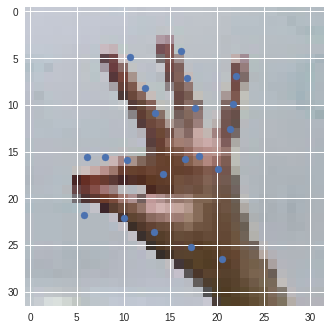

In [0]:
# Load the raw image data
image_dir = "test-32data.save"

data = pickle.load(open(image_dir, 'rb'))
X_train, y_train, X_test, y_test = data['data'][:80000],data['label'][:80000],data['data'][80000:],data['label'][80000:]



sample = np.array(X_train, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_train = model.predict(sample).reshape(-1, 21, 2)

sample = np.array(X_val, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_val = model.predict(sample)

sample = np.array(X_test, 'float64')
mean_image = np.mean(sample, axis=0)
sample -= mean_image
predictions_test = model.predict(sample).reshape(-1, 21, 2)


print("Train set pixels error: %s"%(calculate_error(y_train,predictions_train)))
print("Validation set pixels error: %s" % (calculate_error(y_val, predictions_val)))
print("Test set pixels error: %s" % (calculate_error(y_test, predictions_test)))


In [0]:
demo_index=1000
demo = X_test[demo_index]

out = predictions_test[demo_index]
plt.imshow(cv2.cvtColor(X_test[demo_index], cv2.COLOR_BGR2RGB))
plt.scatter(out[:, 1], out[:, 0])
plt.show()